<a href="https://colab.research.google.com/github/rutia2044/rutiarbiv-gmail.com/blob/master/CreateDataColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

import keras
from keras import models, layers

In [ ]:
images = []
root = '/content/drive/MyDrive/gan-getting-started/monet_jpg'
for file in tqdm(os.listdir(root)):
    images.append(plt.imread(root+'/'+file))
images = np.array(images)

  3%|▎         | 9/300 [00:02<01:14,  3.89it/s]


KeyboardInterrupt: ignored

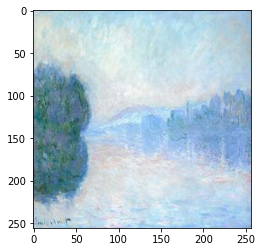

In [ ]:
plt.imshow(images[0])

In [ ]:
images.shape

(300, 256, 256, 3)

In [ ]:

# for i in range(30):
#     selected.append(np.nonzero(kmeans.labels_ == i)[0][0])
#selected =  [72, 182 ,148, 247 ,137, 181 , 16, 298, 149, 166 ,153, 121 ,253,  58 ,183,  15, 280 ,229,
 #185,  80, 146 , 19, 252, 128, 131 ,  3, 145 , 12, 174  ,68]#m fid=195.608,kaggleScore_100Epocs=60
#selected = [133 ,176, 116,  37, 118, 128 , 26 ,124, 161,  32, 291, 267, 146, 114, 280, 206, 273, 287,
 #  3, 252 , 11 , 15 ,184 ,  4 ,258, 126, 131,  34, 248, 201] #min fid=195.12,kaggleScore_200Epocs==57.68
#selected =  [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]#mfid=200.74,kaggleScore_100Epocs=57.9.,kaggleScore_200Epocs=57.6

selected = [160, 262, 146, 294, 187, 252, 279,  78, 199, 282,  19,  80,  62,
        35,  25,  83, 111,   3, 121, 273,  32, 192, 209, 147, 125, 193,
        65, 268, 155, 255]

selected
 

[160,
 262,
 146,
 294,
 187,
 252,
 279,
 78,
 199,
 282,
 19,
 80,
 62,
 35,
 25,
 83,
 111,
 3,
 121,
 273,
 32,
 192,
 209,
 147,
 125,
 193,
 65,
 268,
 155,
 255]

In [ ]:
images[selected].shape

(30, 256, 256, 3)

In [ ]:
import tensorflow as tf

In [ ]:
def image_example(image_string):
  image_shape = tf.io.decode_jpeg(image_string).shape

  feature = {
      'image': _bytes_feature(image_string),
  }

  return tf.train.Example(features=tf.train.Features(feature=feature))


  # The following functions can be used to convert a value to a type compatible
# with tf.train.Example.

def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [ ]:
record_file  = '/content/drive/MyDrive/gan-getting-started/ido1.tfrec'
with tf.io.TFRecordWriter(record_file) as writer:
  for filename in np.array(list(os.listdir('/content/drive/MyDrive/gan-getting-started/model_outputs')))[:2]:
    print(filename)
    image_string = open('/content/drive/MyDrive/gan-getting-started/model_outputs' + '/' + filename, 'rb').read()
    tf_example = image_example(image_string)
    writer.write(tf_example.SerializeToString())

710afec54e.jpg
07939b1fde.jpg


In [ ]:
root

'/content/drive/MyDrive/gan-getting-started/monet_jpg'